<a href="https://colab.research.google.com/github/Myavuzars/Deep-Learning-Models/blob/main/Bean_Image_Classifications_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import PIL
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)

2.4.0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip -uq "/content/drive/MyDrive/Colab Notebooks/Tensorflow Datasets/BEAN.zip" -d "/content/drive/My Drive/Colab Notebooks/Tensorflow Datasets"




In [4]:
train_dir = '/content/drive/My Drive/Colab Notebooks/Tensorflow Datasets/BEAN/train'
valid_dir = '/content/drive/My Drive/Colab Notebooks/Tensorflow Datasets/BEAN/validation'
test_dir = '/content/drive/My Drive/Colab Notebooks/Tensorflow Datasets/BEAN/test'


In [5]:
path = os.listdir( test_dir )
image_count = len(os.listdir(test_dir))
print(image_count)

3


In [7]:
for file in path:
  print (file)

angular_leaf_spot
bean_rust
healthy


In [8]:
train_im_gen = ImageDataGenerator(rescale= 1./255,
                                   zoom_range= 0.2,
                                   width_shift_range= 0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   validation_split= 0.0)

validation_im_gen = ImageDataGenerator(rescale=1./255)

test_im_gen = ImageDataGenerator(rescale= 1./255 )



In [30]:
train_datagen= train_im_gen.flow_from_directory(train_dir,
                                             target_size= (300,300),
                                             batch_size=32,
                                             shuffle=True,
                                             class_mode='sparse' )

valid_datagen= validation_im_gen.flow_from_directory(valid_dir ,
                                             batch_size =32,
                                             class_mode='sparse',
                                             target_size= (300,300))
test_datagen = test_im_gen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               class_mode='sparse',
                                               target_size= (300,300)
                                               )
test_datagen2 = test_im_gen.flow_from_directory(test_dir,
                                                class_mode='sparse',                                                                                 
                                               )

Found 1034 images belonging to 3 classes.
Found 133 images belonging to 3 classes.
Found 128 images belonging to 3 classes.
Found 128 images belonging to 3 classes.


In [10]:
training_images, _ = next(train_datagen) 

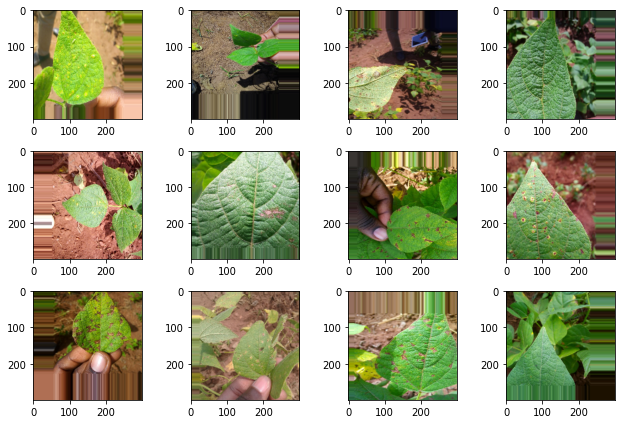

In [11]:
def plotImages(images_arr):
    fig, axes = plt.subplots(3, 4, figsize=(9,6))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
plotImages(training_images[:12])  # Plot 12 images



In [12]:
# Build the Model

model= tf.keras.Sequential([tf.keras.layers.Conv2D(32,(3,3),padding='same', input_shape=(300,300,3), activation ='relu'),
                            tf.keras.layers.MaxPooling2D(2,2),
                            
                            tf.keras.layers.Conv2D(128,(3,3),padding='same', activation='relu'),
                            tf.keras.layers.MaxPooling2D(2,2),

                            tf.keras.layers.Conv2D(512, (3,3),padding='same', activation='relu'),
                            tf.keras.layers.MaxPooling2D(2,2),

                            tf.keras.layers.Dropout(0.4),
                            tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(128,activation='relu'),
                            tf.keras.layers.Dense(3, activation='softmax')

                            ])

In [13]:
#Compile Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Note that SPARSE CATEGORICAL works with integer categoricalvariable, if you do not specify Softmax, then we should add (from_logits=True)

In [14]:
EPOCHS=3
#Fit the model
history = model.fit(train_datagen, 
          epochs= EPOCHS,
          validation_data = valid_datagen)

Epoch 1/3
33/33 [==============================] - 603s 18s/step - loss: 5.8777 - accuracy: 0.3627 - val_loss: 0.7892 - val_accuracy: 0.6767
Epoch 2/3
33/33 [==============================] - 28s 848ms/step - loss: 0.9089 - accuracy: 0.5964 - val_loss: 0.7385 - val_accuracy: 0.6466
Epoch 3/3
33/33 [==============================] - 28s 854ms/step - loss: 0.7924 - accuracy: 0.6520 - val_loss: 0.6349 - val_accuracy: 0.7293


In [15]:
acc= history.history['accuracy']
val_acc= history.history['val_accuracy']

loss= history.history['loss']
val_loss= history.history['val_loss']

epochs_range= range(EPOCHS)

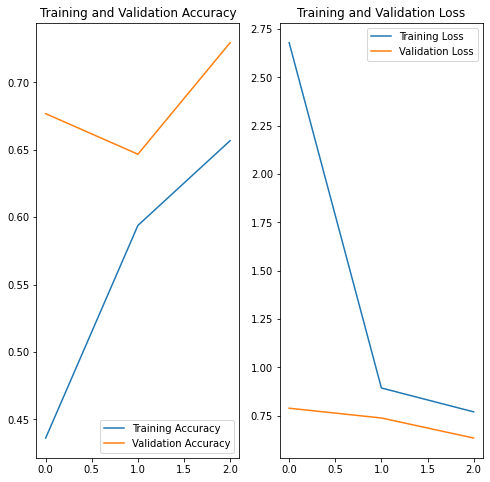

In [16]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()


In [17]:
#Evaluate Accuracy
test_loss, test_accuracy  = model.evaluate(test_datagen, batch_size=32)

print('Accuracy on test dataset:', test_accuracy)

4/4 [==============================] - 52s 17s/step - loss: 0.5936 - accuracy: 0.7734
Accuracy on test dataset: 0.7734375


In [18]:
#Prediction
predicts =np.argmax(model.predict(test_datagen), axis=-1)
print(list(predicts))
print(len(predicts))

[0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 0, 2, 2, 2, 1, 0, 2, 2, 0, 1, 0, 2, 1, 2, 1, 2, 2, 0, 1, 0, 2, 1, 1, 1, 1, 1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 0, 0, 0, 0, 2, 0, 1, 2, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 2, 0, 1, 0, 2, 2, 1, 1, 2, 2, 1, 2, 0, 2, 1, 1, 2, 2, 2, 0, 1, 2, 1, 2, 0, 0, 2, 1, 1, 1, 2, 1, 0, 2, 2, 2, 1, 0, 0, 0]
128


In [ ]:
##### THIS CELL BELOW ONLY RETURNS A BATCH SIZE OF CLASSESS, I NEED TO GET THE ALL CLASSES IN ORDER TO MAKE A CLASSISFICATION

In [31]:
_, test_labels = next(test_datagen2)
labels= test_labels.astype(int)
print(list((labels)))

[0, 1, 2, 1, 2, 0, 1, 1, 1, 2, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 2, 2, 1, 2, 0, 2, 1, 2, 2, 0, 2, 2]


In [ ]:
#Confusion Matrix

#confusion_mtx=tf.math.confusion_matrix(
#    labels, predicts, num_classes=3, weights=None, dtype=tf.dtypes.int32,
#    name=None
#)

In [ ]:
#confusion_mtx = tf.math.confusion_matrix(y_true, y_pred) 
#plt.figure(figsize=(10, 8))
#sns.heatmap(confusion_mtx, xticklabels=commands, yticklabels=commands, 
#            annot=True, fmt='g')
#plt.xlabel('Prediction')
#plt.ylabel('Label')
#plt.show()